# Vehicle Routing Problem (VRP) Solver 

### Benefits of Using This Model

1. Cost Reduction:
- By minimizing total travel distances, this model reduces fuel and labor costs associated with delivery operations.
- Improved Customer Satisfaction:
- Shorter delivery times ensure timely deliveries, enhancing customer experience.

2. Scalability:
- Heuristic methods can handle a growing number of customers and depots, making them suitable for scaling operations.

### Key Insights

1. Optimization Impact:
- The 2-opt algorithm significantly improved route efficiency over the Nearest Neighbor baseline.

2. Practical Feasibility:
- Heuristic algorithms provide quick and effective solutions for real-world logistics problems.

### Future Enhancements:

- Incorporating real-time data such as traffic patterns or delivery time windows could further optimize the solutions.
- Exploring advanced techniques like reinforcement learning could lead to dynamic and adaptive routing strategies.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

In [5]:
# Load the Excel file and first sheet into a DataFrame
file_path = '19MDVRP Problem Sets.xlsx'
df = pd.read_excel(file_path, sheet_name='Problem 1')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Display basic information about the DataFrame, including data types and non-null counts
print("\nData Information:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])  # Display only columns with missing values

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

First few rows of the DataFrame:
   Problem  Customer Number  x coordinate  y coordinate  Number of Depots  \
0      1.0                1            37            52               1.0   
1      NaN                2            49            49               2.0   
2      NaN                3            52            64               3.0   
3      NaN                4            20            26               4.0   
4      NaN                5            40            30               NaN   

   Depot x coordinate  Depot y coordinate  
0                20.0                20.0  
1                30.0                40.0  
2                50.0                30.0  
3                60.0                50.0  
4                 NaN                 NaN  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Problem         

In [ ]:
# Data Cleaning and Duplicate Removal

In [6]:
# Remove duplicates if found
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

if duplicates > 0:
    df.drop_duplicates(inplace=True)

# Display the cleaned DataFrame
print("\nCleaned Data:")
print(df.head())


Number of Duplicates: 0

Cleaned Data:
   Problem  Customer Number  x coordinate  y coordinate  Number of Depots  \
0      1.0                1            37            52               1.0   
1      NaN                2            49            49               2.0   
2      NaN                3            52            64               3.0   
3      NaN                4            20            26               4.0   
4      NaN                5            40            30               NaN   

   Depot x coordinate  Depot y coordinate  
0                20.0                20.0  
1                30.0                40.0  
2                50.0                30.0  
3                60.0                50.0  
4                 NaN                 NaN  


In [7]:
# Exploring Specific Features and Data Distribution


Unique Customer Numbers:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


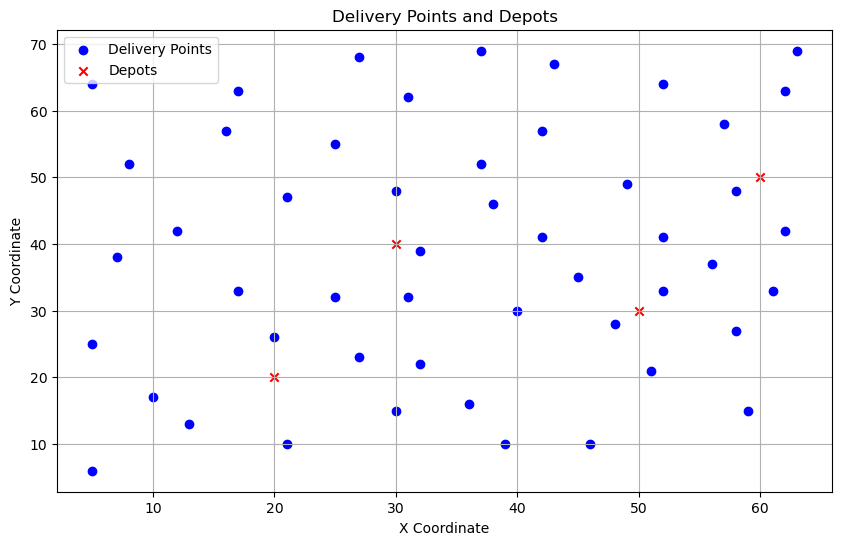

In [8]:
# Explore specific features: checking unique values and distributions
print("\nUnique Customer Numbers:")
print(df['Customer Number'].unique())

# You can visualize the distribution of x and y coordinates using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['x coordinate'], df['y coordinate'], c='blue', label='Delivery Points')
plt.scatter(df['Depot x coordinate'], df['Depot y coordinate'], c='red', marker='x', label='Depots')
plt.title('Delivery Points and Depots')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()


In [9]:
# Implementing and Visualizing the Nearest Neighbor Heuristic

Nearest Neighbor Tour: [0, 31, 10, 37, 4, 48, 8, 49, 15, 1, 28, 20, 33, 29, 9, 38, 32, 44, 14, 43, 36, 16, 3, 17, 46, 11, 45, 26, 47, 5, 13, 24, 12, 40, 18, 41, 39, 23, 22, 6, 25, 7, 30, 27, 2, 19, 34, 35, 21, 42]


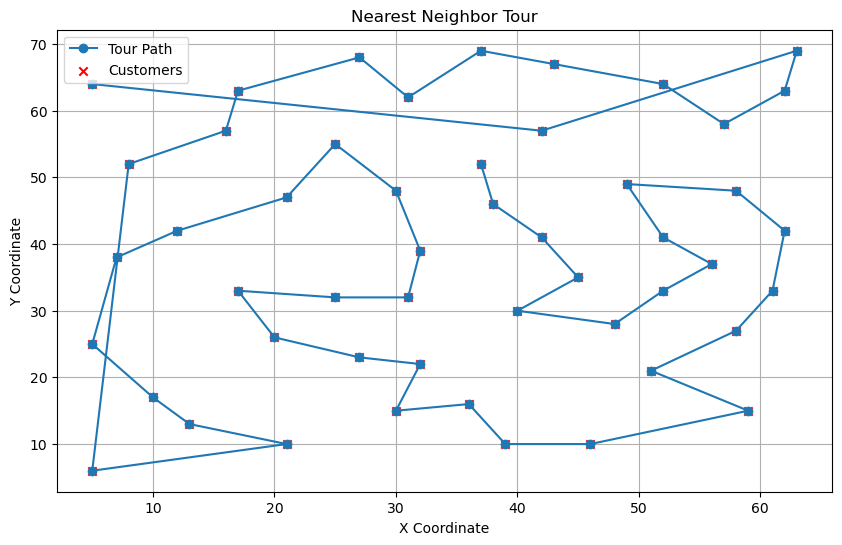

In [10]:
# Extract relevant coordinates and customer demand (assuming all demands are equal for simplicity)
coords = df[['x coordinate', 'y coordinate']].to_numpy()
num_customers = coords.shape[0]

# Nearest Neighbor Heuristic
def nearest_neighbor(coords):
    visited = [False] * num_customers
    tour = []
    current_index = 0  # Start from the first customer
    visited[current_index] = True
    tour.append(current_index)

    for _ in range(num_customers - 1):
        nearest_distance = float('inf')
        nearest_index = None

        # Find the nearest unvisited customer
        for i in range(num_customers):
            if not visited[i]:
                distance = np.linalg.norm(coords[current_index] - coords[i])
                if distance < nearest_distance:
                    nearest_distance = distance
                    nearest_index = i
        
        # Move to the nearest customer
        visited[nearest_index] = True
        tour.append(nearest_index)
        current_index = nearest_index

    return tour

# Run the nearest neighbor algorithm
tour = nearest_neighbor(coords)

# Display the tour
print("Nearest Neighbor Tour:", tour)

# Visualize the route
plt.figure(figsize=(10, 6))
plt.plot(*coords[tour, :].T, marker='o', label='Tour Path')
plt.scatter(coords[:, 0], coords[:, 1], c='red', label='Customers', marker='x')
plt.title('Nearest Neighbor Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()


In [11]:
# Calculating the Route Cost

In [12]:
def calculate_route_cost(route, coords):
    """Calculate the total distance of the given route."""
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += np.linalg.norm(coords[route[i]] - coords[route[i + 1]])
    return total_distance

# Evaluate the cost of the generated tour
total_cost = calculate_route_cost(tour, coords)
print("Total Cost of the Route:", total_cost)

Total Cost of the Route: 478.417468383246


In [13]:
# Route Optimization Using the 2-Opt Algorithm

In [14]:
def two_opt(route, coords):
    """2-opt algorithm to improve the route."""
    best_route = route.copy()
    best_cost = calculate_route_cost(best_route, coords)
    improved = True
    
    while improved:
        improved = False
        for i in range(1, len(best_route) - 1):
            for j in range(i + 1, len(best_route)):
                if j - i == 1: 
                    continue  # Skip adjacent nodes
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]  # Reverse the segment
                new_cost = calculate_route_cost(new_route, coords)
                if new_cost < best_cost:
                    best_route = new_route
                    best_cost = new_cost
                    improved = True

    return best_route

# Run the 2-opt optimization on the nearest neighbor route
optimized_route = two_opt(tour, coords)
optimized_cost = calculate_route_cost(optimized_route, coords)
print("Optimized Route:", optimized_route)
print("Optimized Cost:", optimized_cost)


Optimized Route: [0, 26, 45, 11, 46, 17, 12, 40, 39, 18, 41, 3, 16, 36, 43, 14, 44, 32, 38, 9, 29, 33, 20, 28, 1, 15, 49, 8, 48, 4, 37, 10, 31, 21, 19, 34, 35, 2, 27, 30, 25, 7, 47, 5, 13, 24, 23, 22, 6, 42]
Optimized Cost: 430.716868165897


In [15]:
# Visualizing the Optimized Route

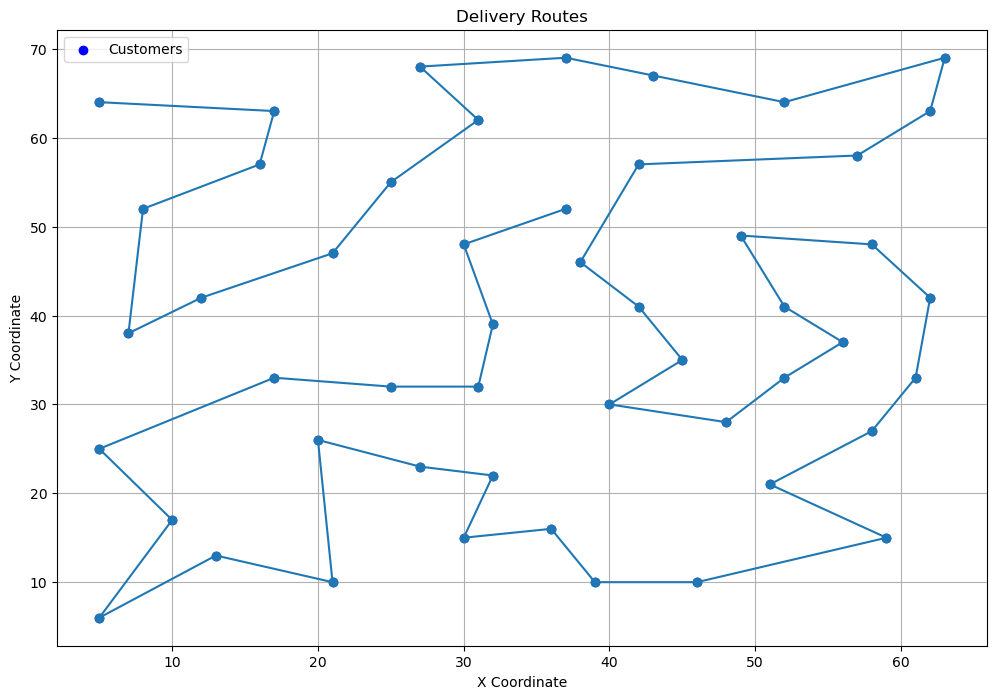

In [16]:
def visualize_routes(routes, coords, depots=None):
    plt.figure(figsize=(12, 8))
    
    # Plot delivery points
    plt.scatter(coords[:, 0], coords[:, 1], c='blue', label='Customers', marker='o')
    
    # If depots are provided, plot them
    if depots is not None:
        plt.scatter(depots[:, 0], depots[:, 1], c='red', label='Depots', marker='x', s=100)

    # Plot routes
    for route in routes:
        route_coords = coords[route]
        plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')

    plt.title('Delivery Routes')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.grid()
    plt.show()

# Visualize the optimized route
visualize_routes([optimized_route], coords)

In [17]:
# Function to visualize routes on a map using Folium
def visualize_routes_on_map(routes, coords, depots=None):
    m = folium.Map(location=[coords[:, 1].mean(), coords[:, 0].mean()], zoom_start=12)
    
    for idx, (x, y) in enumerate(coords):
        folium.Marker([y, x], popup=f'Customer {idx+1}', icon=folium.Icon(color='blue')).add_to(m)
    
    if depots is not None:
        for idx, (x, y) in enumerate(depots):
            folium.Marker([y, x], popup=f'Depot {idx+1}', icon=folium.Icon(color='red')).add_to(m)

    for route in routes:
        route_coords = coords[route]
        folium.PolyLine(locations=[(y, x) for x, y in route_coords], color='blue', weight=5).add_to(m)

    return m

# Save and display the map of the route
m = visualize_routes_on_map([optimized_route], coords)
m.save("delivery_routes_map.html")
m
